# Cosine Similarity with Python #

## Math Foundations ##

<p>Cosine Similarity (a.k.a. Cosine Distance) is a measure of similarity between vectors. I recently came across using Cosine Similarity in a lecture about Recommender Systems in Data Science. </p>
    
<p>The mathematics behind Cosine Similarity is pretty straight forward (thank goodness!) and we will only need to be super familiar with the dot product between two vectors. Hopefully we all payed attention in pre-calculus. If you are one of the lucky ones that took a vector calculus course, I hope you weren't surprised when the mighty dot product showed up again.</p>

### Dot Product Formula ###

<p>$$ \vec{A} \, \cdot \, \vec{B} = \, \parallel\vec{A} \parallel \parallel\vec{B}\parallel\cos(\theta)$$
</p>    
    
<p> The formula can be rearranged to give us the angle between the vectors:</p>
    
<p> $$ Similarity = \cos(\theta) = \frac{\vec{A} \, \cdot \, \vec{B}}{\parallel\vec{A} \parallel \parallel\vec{B}\parallel} $$ </p>
    



### Pop Quiz ###
**Q:** what is the Range of the cosine function?<br>
**A:** [-1,1]

<p>From the pop quiz, we get that the values of the cosine similarity will be between -1 and 1. That is, the most similar vectors will have values closer to one and the least similar vectors will have cosine similarity values closer to negative one. For those who think and dream in vectors, this a good stopping point - take a well earned break and enjoy your new insight. </p>

<p>For everyone that's still with me, let's put together a cool example of how to actually <b>APPLY</b> Cosine Similarity. </p>

## Movie Reviews ##
<p>Our example will focus on movie reviews and determining if different reviewers have similar taste in movies. How are we going to quantify these similarities? Bingo - Cosine Similarity </p>
    
<p>Here is a table of our movie reviewers and their respective ratings. The ratings are from 0 to 5 out of 5 and an empty rating indicates they did not rate that title.The data is made up and I picked a few movies from 2020</p>

<table>
<thead>
<tr>
    <th>Reviewer Name</th>
    <th>Tenet (2020)</th>
    <th>Mulan (2020)</th>
    <th>Soul (2020)</th>
    <th>Wonder Woman 1984 (2020)</th>
    <th>The Invisilble Man (2020)</th>
</tr>
</thead>
<tbody>
<tr>
    <td>Alice</td>
    <td></td>
    <td>5</td>
    <td>4</td>
    <td>5</td>
    <td></td>
</tr>
<tr>
    <td>Bob</td>
    <td>5</td>
    <td>2</td>
    <td>1</td>
    <td></td>
    <td></td>
</tr>
<tr>
    <td>Charlie</td>
    <td>5</td>
    <td>5</td>
    <td></td>
    <td></td>
    <td>2</td>
</tr>
<tr>
    <td>Drake</td>
    <td>1</td>
    <td></td>
    <td>5</td>
    <td>2</td>
    <td>5</td>
</tr>    
</tbody>
</table>

<p><a href="https://www.youtube.com/watch?v=xOsLIiBStEs&ab_channel=Pixar" title="Optional Title">Soul Trailer</a></p>


## Python Code ##
<p>Let's import our modules and declare the our reviews as vectors</p>

In [1]:
import numpy as np
import pandas as pd

#printing module versions
print('Numpy %s \nPandas %s' % (np.__version__, pd.__version__))

#numpy arrays for our review vectors
#empty reviews are entered as numpy null values 
alice   = np.array([np.nan , 5, 4, 5,np.nan ])
bob     = np.array([5, 2, 1,np.nan, np.nan])
charlie = np.array([5, 5, np.nan, np.nan, 2])
drake   = np.array([1, np.nan, 5, 2, 5])


Numpy 1.19.5 
Pandas 0.25.1


In [2]:
#making a pandas dataframe for our data 

#column and index names
col_names = [ 'Tenet', 'Mulan', 'Soul', 'WW1984', 'InvisbleMan']
index_names = ['alice', 'bob', 'charlie', 'drake']

df = pd.DataFrame([alice, bob, charlie, drake], 
                  index = index_names , columns = col_names)
df

,Tenet,Mulan,Soul,WW1984,InvisbleMan
alice,NaN,5.0,4.0,5.0,NaN
bob,5.0,2.0,1.0,NaN,NaN
charlie,5.0,5.0,NaN,NaN,2.0
drake,1.0,NaN,5.0,2.0,5.0


<p>Now we need a way to take care of the missing ratings. If we simply treated them as zero ratings then this would imply that the reviewer gave a negative rating. <br> Instead, we can normalize the ratings by subtracting the row mean. </p>
<p>For Alice, the mean rating is 14/3 (4.667). If we subtract the 14/3 from each of Alice's ratings we'll get:</p>
<table>
<thead>
<tr>
    <th>Reviewer Name</th>
    <th>Tenet (2020)</th>
    <th>Mulan (2020)</th>
    <th>Soul (2020)</th>
    <th>Wonder Woman 1984 (2020)</th>
    <th>The Invisilble Man (2020)</th>
</tr>
</thead>
<tbody>
<tr>
    <td>Alice</td>
    <td></td>
    <td>1/3</td>
    <td>-2/3</td>
    <td>1/3</td>
    <td></td>
</tr>
</tbody>
</table>

<p> This tells us which movies Alice liked above average and we can give the unreviewed movies values of zero.</p>
<p> Following this same process for our other reviewers we get: </p>
    
<table>
<thead>
<tr>
    <th>Reviewer Name</th>
    <th>Tenet (2020)</th>
    <th>Mulan (2020)</th>
    <th>Soul (2020)</th>
    <th>Wonder Woman 1984 (2020)</th>
    <th>The Invisilble Man (2020)</th>
</tr>
</thead>
<tbody>
<tr>
    <td>Alice</td>
    <td>0</td>
    <td>1/3</td>
    <td>-2/3</td>
    <td>1/3</td>
    <td>0</td>
</tr>
<tr>
    <td>Bob</td>
    <td>7/3</td>
    <td>-2/3</td>
    <td>-5/3</td>
    <td>0</td>
    <td>0</td>
</tr>
<tr>
    <td>Charlie</td>
    <td>1</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>-2</td>
</tr>
<tr>
    <td>Drake</td>
    <td>-9/4</td>
    <td>0</td>
    <td>7/4</td>
    <td>-5/4</td>
    <td>7/4</td>
</tr>    
</tbody>
</table>


In [3]:
# adjusting our dataframe to normalize and center the row vectors 

for name in df.index:
    df.loc[name] = df.loc[name] - df.loc[name].mean(skipna = True)
    


In [4]:
#replacing the nan values with zero
df.fillna(0, inplace = True)
df

,Tenet,Mulan,Soul,WW1984,InvisbleMan
alice,0.000000,0.333333,-0.666667,0.333333,0.00
bob,2.333333,-0.666667,-1.666667,0.000000,0.00
charlie,1.000000,1.000000,0.000000,0.000000,-2.00
drake,-2.250000,0.000000,1.750000,-1.250000,1.75


##  Cosine Similarity Function #### 
<p>Note: The maginitude of a vector is the same as the square root of the vector dot product with itself</p>
<p> $$ \parallel \vec{b} \parallel = \sqrt{ \vec{b} \cdot \vec{b}} $$ </p>
<p> $$ Similarity = \cos(\theta) = \frac{\vec{a} \, \cdot \, \vec{b}}{\parallel\vec{a} \parallel \parallel\vec{b}\parallel} $$ </p>

In [5]:
def cos_similarity(a, b):
    #magnitude of each vector 
    a_mag = np.sqrt(np.dot(a,a))
    b_mag = np.sqrt(np.dot(b,b))
    
    return (np.dot(a,b))/(a_mag*b_mag)

<p>Let's loop through all the pairs of reviewers and see what we get... </p>

In [6]:
pairs = [['alice', 'bob'], ['alice', 'charlie'], ['alice', 'drake'], 
         ['bob', 'charlie'], ['bob', 'drake'],['charlie', 'drake']]

for pair in pairs:
    v1 = df.loc[pair[0]]
    v2 = df.loc[pair[1]]
    print('{} and {} are {} similar'.format(pair[0].title(), pair[1].title(), 
                                            round(cos_similarity(v1,v2),5)))
    print('\n')

Alice and Bob are 0.3698 similar


Alice and Charlie are 0.16667 similar


Alice and Drake are -0.54308 similar


Bob and Charlie are 0.23113 similar


Bob and Drake are -0.7769 similar


Charlie and Drake are -0.65741 similar




### Do Our Results Make Sense? ###
<p>Let's look at our original ratings table again:</p>
<table>
<thead>
<tr>
    <th>Reviewer Name</th>
    <th>Tenet (2020)</th>
    <th>Mulan (2020)</th>
    <th>Soul (2020)</th>
    <th>Wonder Woman 1984 (2020)</th>
    <th>The Invisilble Man (2020)</th>
</tr>
</thead>
<tbody>
<tr>
    <td>Alice</td>
    <td></td>
    <td>5</td>
    <td>4</td>
    <td>5</td>
    <td></td>
</tr>
<tr>
    <td>Bob</td>
    <td>5</td>
    <td>2</td>
    <td>1</td>
    <td></td>
    <td></td>
</tr>
<tr>
    <td>Charlie</td>
    <td>5</td>
    <td>5</td>
    <td></td>
    <td></td>
    <td>2</td>
</tr>
<tr>
    <td>Drake</td>
    <td>1</td>
    <td></td>
    <td>5</td>
    <td>2</td>
    <td>5</td>
</tr>    
</tbody>
</table>

<p> <b>Most Similar</b> </p>
<p> Alice and Bob are ranked the most similar at 0.3698. This isn't a very strong similarity and we can only see that Alice and Bob rated Soul (2020) as their lowest out of the movies each of them rated. </p>

<p> <b>Least Similar</b></p>

<p> Bob and Drake are the least similar pair at -0.7769. Bob rated Tenet (2020) the highest with 5/5 and Drake rated the same film 1/5. This least similar pair is pretty clear and we can see that Bob liked almost all the movies Drake didn't like. </p>

## Shortcut with sklearn.metrics ##

<p> Now that we know the inner workings of Cosine Similarity, we can use Python moduels to perform the same function and not have to build things from scratch each time. <br>The sklearn.metrics module has it's own cosine_similarity function that we can import and use </p>


In [7]:
from sklearn.metrics.pairwise import cosine_similarity

<p>The function cannot process NaN values <br> We will use the normalized ratings we have used up to this point</p>

In [8]:
df

,Tenet,Mulan,Soul,WW1984,InvisbleMan
alice,0.000000,0.333333,-0.666667,0.333333,0.00
bob,2.333333,-0.666667,-1.666667,0.000000,0.00
charlie,1.000000,1.000000,0.000000,0.000000,-2.00
drake,-2.250000,0.000000,1.750000,-1.250000,1.75


In [9]:
# we'll make k the dataframe of cosine similarities between each user
k = pd.DataFrame(cosine_similarity(df, df))

#renaming index and columns
k.index = index_names
k.columns = index_names

k

,alice,bob,charlie,drake
alice,1.000000,0.369800,0.166667,-0.543079
bob,0.369800,1.000000,0.231125,-0.776897
charlie,0.166667,0.231125,1.000000,-0.657411
drake,-0.543079,-0.776897,-0.657411,1.000000


Now we can import some visualization tools and make a heatmap to visualize the similarities between the movie reviewers.<br>The 'coolwarm' color map shows the most similar values in red (warm colors) and the least similar values in blue (cool colors).

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

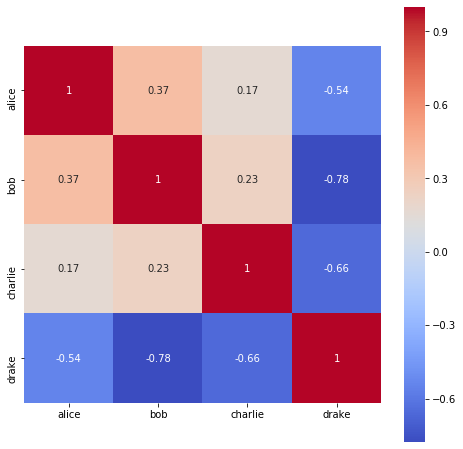

In [11]:
plt.figure(figsize = (8,8))
ax = sns.heatmap(k, cmap = 'coolwarm', annot = True, square = True, )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

## Conclusion ## 

<p> Cosine Similarity is a good way to interpret similarity between vectors and uses some pretty lightweight mathematics. <br>The example of movie reviews is a fun and simple example to see Cosine Similarity in action. You can imagine how a large movie streaming service could use similar methods to identify similar users and recommend movies they might watch. </p>
<p> The heavy-lifting required for finding similarities in data is cleaning and processing the data itself. This is the case in most areas of data science and data analytics.</p>
<p> Cosine Similarity is by no means the only measure of similarity or distance. Hamming Distance, Sorensen-Dice coefficient, and others are other methods to guage similarity. </p>
<p><a href="https://en.wikipedia.org/wiki/Cosine_similarity" title="Optional Title">Wikipedia - Cosine Similarity</a></p>